# Proyek Analisis Data



*   Nama : Antika Orinda
*   Github : Antika20


*   Dicoding : ANTIKA ORINDA

File dataset : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset








# Menentuka Pertanyaan Bisnis



1.   Bagaimana pengaruh musim dalam tren Bike sharing
2.   Bagaimana pengaruh setiap tahun, bulan dan jam dalam tren bike sharing
3.   Apakah ada pengaruh hari libur dalam tren bike sharing
4.  Apakah ada pengaruh hari kerja dalam tren bike sharing
5. Apakah Pengaruh Cuaca dalam tren bike sharing




### Gathering Data

In [1]:
import numpy as np # Mengimport library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Antika20/BDAP-Dicoding/main/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Antika20/BDAP-Dicoding/main/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

###day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### tabel_hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Memperbaiki tipe data table day

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Memperbaiki tipe data table hour

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Exploratory Data Analysis (EDA)


### Explore day_df

In [16]:
day_df.loc[day_df["season"] == 1, "season"] = "Spring"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

Fall      188
Spring    181
Summer    184
Winter    178
Name: season, dtype: int64

In [17]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"


day_df.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [18]:
day_df.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [19]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [20]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sunday"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Monday"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tuesday"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wednesday"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thursday"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Friday"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Saturday"

day_df.weekday.value_counts().sort_index()

Friday       104
Monday       105
Saturday     105
Sunday       105
Thursday     104
Tuesday      104
Wednesday    104
Name: weekday, dtype: int64

In [21]:

day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [22]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

Clear         463
Cloudy        247
Light Snow     21
Name: weathersit, dtype: int64

###Visualization

## Bagaimana pengaruh musim dalam tren Bike sharing

In [23]:
byseason_df = day_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byseason_df

,season,sum
0,Fall,188
1,Spring,181
2,Summer,184
3,Winter,178


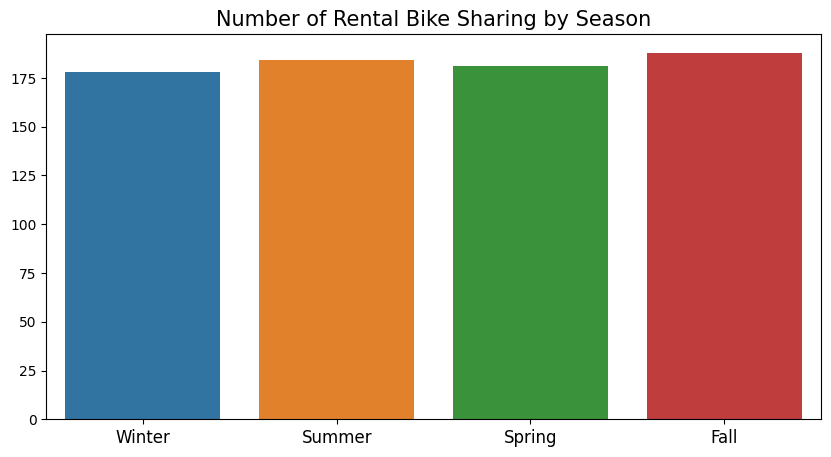

In [24]:
byseason_df = day_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
     "instant": "sum"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),

)
plt.title("Number of Rental Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Bagaimana pengaruh setiap tahun, bulan dan jam dalam tren bike sharing

In [25]:
yr_df = day_df.groupby(by="yr").instant.nunique().reset_index()
yr_df.rename(columns={
    "instant": "sum"
}, inplace=True)
yr_df

,yr,sum
0,2011,365
1,2012,366


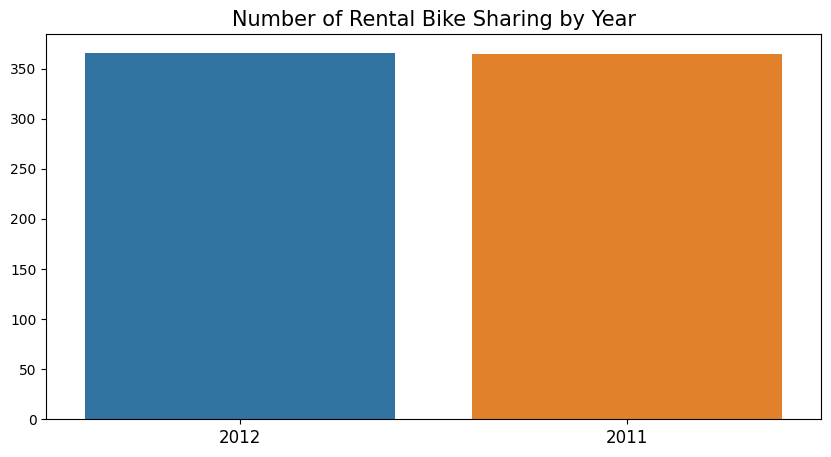

In [26]:
yr_df = day_df.groupby(by="yr").instant.nunique().reset_index()
yr_df.rename(columns={
     "instant": "sum"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="yr",
    data=yr_df.sort_values(by="yr", ascending=False),

)
plt.title("Number of Rental Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

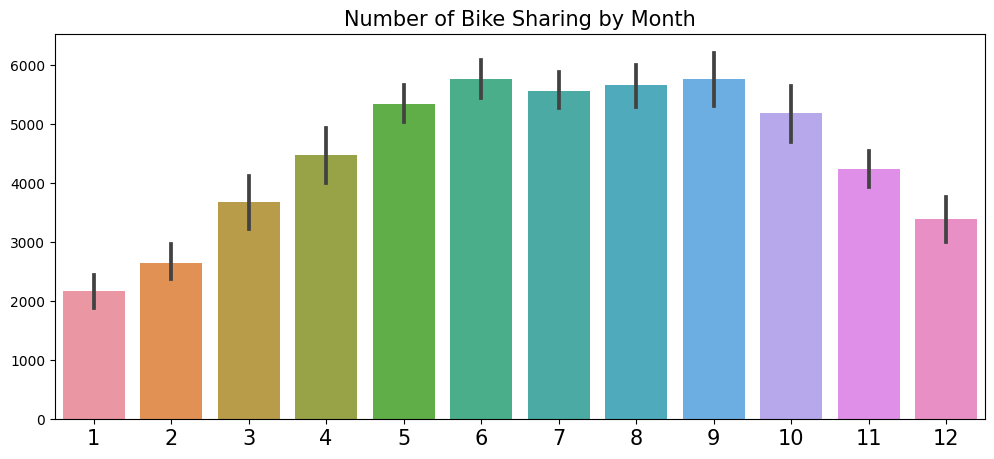

In [27]:
plt.figure(figsize=(12, 5))

sns.barplot(
    y="cnt",
    x="mnth",
    data=day_df.sort_values(by="mnth", ascending=False),
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=15)
plt.show()

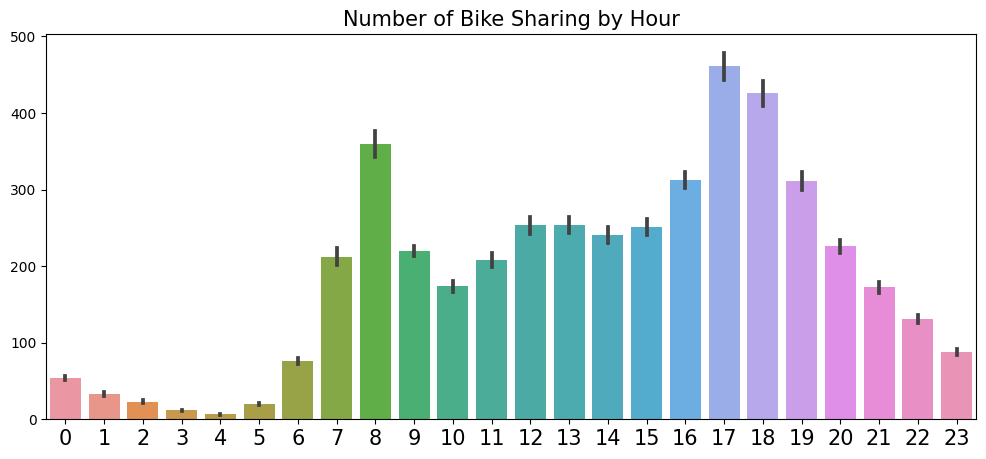

In [28]:
plt.figure(figsize=(12, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_df.sort_values(by="hr", ascending=False),
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=15)
plt.show()

In [29]:
holiday_df = day_df.groupby(by="holiday").instant.nunique().reset_index()
holiday_df.rename(columns={
    "instant": "sum"
}, inplace=True)
holiday_df

,holiday,sum
0,Holiday,710
1,Not a Holiday,21


## Apakah ada pengaruh hari libur dalam tren bike sharing

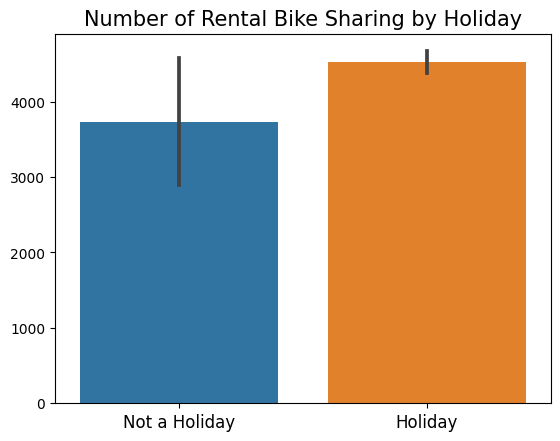

In [30]:
# byHoliday_df = day_df.groupby(by="holiday").instant.nunique().reset_index()
# byHoliday_df.rename(columns={
#      "instant": "sum"
# }, inplace=True)

# plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="holiday",
    data=day_df.sort_values(by="holiday", ascending=False),

)
plt.title("Number of Rental Bike Sharing by Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Apakah ada pengaruh hari kerja dalam tren bike sharing

In [31]:
workingDay_df = day_df.groupby(by="workingday").instant.nunique().reset_index()
workingDay_df.rename(columns={
    "instant": "sum"
}, inplace=True)
workingDay_df

,workingday,sum
0,Holiday,231
1,Working Day,500


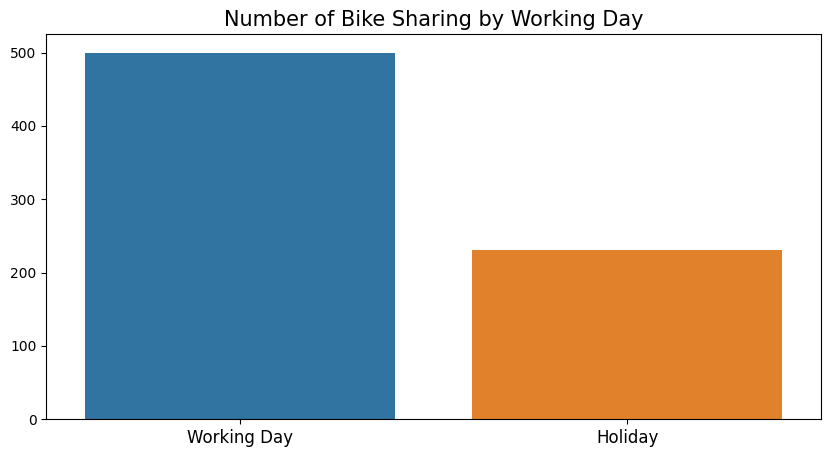

In [35]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=workingDay_df.sort_values(by="workingday", ascending=False),
)
plt.title("Number of Bike Sharing by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Apakah Pengaruh Cuaca dalam tren bike sharing

In [36]:
weather_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
weather_df.rename(columns={
    "instant": "sum"
}, inplace=True)
weather_df

,weathersit,sum
0,Clear,463
1,Cloudy,247
2,Light Snow,21


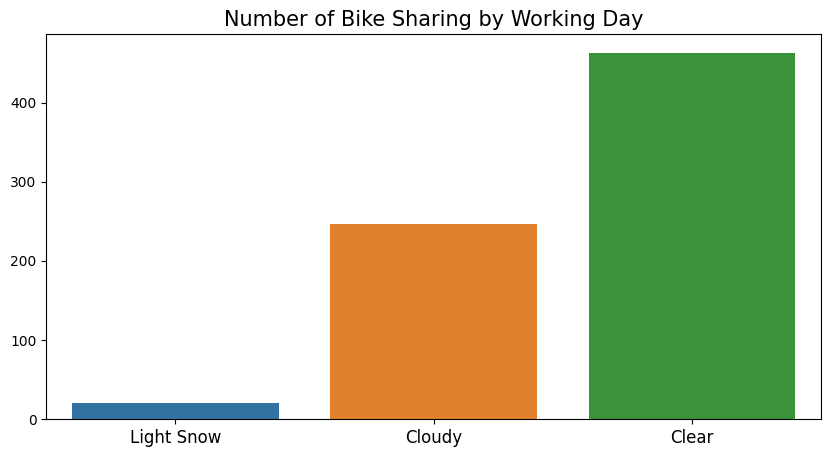

In [39]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=weather_df.sort_values(by="weathersit", ascending=False),
)
plt.title("Number of Bike Sharing by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [42]:
day_df.to_csv("clean_bike_sharing2.csv", index=False) # Menyimpan berkas data